In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Cell 1
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
import cv2

from PIL import Image

# Set your device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
# Cell 2
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Set your dataset path
train_dataset_path = 'dataset/train/'
val_dataset_path = 'dataset/valid/'
categories = ['fifty','five','fivehundred','hundred','ten','thousand','twenty']


In [3]:
print("train dir is ", train_dataset_path)

train dir is  dataset/train/


In [4]:
import os
for category in categories:
  print("There are {} {} training images".format(len(os.listdir(os.path.join(train_dataset_path,category))),category))

There are 2579 fifty training images
There are 1523 five training images
There are 2383 fivehundred training images
There are 2531 hundred training images
There are 3068 ten training images
There are 2423 thousand training images
There are 2565 twenty training images


In [5]:
# Getting 5 images of each from seven classes
def extract_images(data_dir,no):
  img_paths = []
  for category in categories:
    i = 0
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
      i+= 1
      if i > no:
        break
      img_paths.append(os.path.join(path,img))
  return img_paths

In [6]:
training_image_paths = extract_images(train_dataset_path,5)
print(training_image_paths)
print(len(training_image_paths))

['dataset/train/fifty\\50 RS. REP.jpg', 'dataset/train/fifty\\53ddc587356098b252c50484dc0b47a0.jpg', 'dataset/train/fifty\\800px-Reverse_of_50_o.jpg', 'dataset/train/fifty\\Compressed_IMG_20180930_121249.jpg', 'dataset/train/fifty\\Compressed_IMG_20180930_121258.jpg', 'dataset/train/five\\captured_image_10.png', 'dataset/train/five\\captured_image_11.png', 'dataset/train/five\\captured_image_12.png', 'dataset/train/five\\captured_image_13.png', 'dataset/train/five\\captured_image_3.png', 'dataset/train/fivehundred\\500_nepalese_rupees_-_king_-_back.jpg', 'dataset/train/fivehundred\\captured_image_11.png', 'dataset/train/fivehundred\\captured_image_14.png', 'dataset/train/fivehundred\\captured_image_15.png', 'dataset/train/fivehundred\\captured_image_16.png', 'dataset/train/hundred\\1000.jpg', 'dataset/train/hundred\\captured_image_1.png', 'dataset/train/hundred\\captured_image_10.png', 'dataset/train/hundred\\captured_image_11.png', 'dataset/train/hundred\\captured_image_12.png', 'data

In [7]:
# Create datasets and dataloaders
train_dataset = datasets.ImageFolder(train_dataset_path, transform=transform)
val_dataset = datasets.ImageFolder(val_dataset_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [8]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def visualize_images(images_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  rows = rows
  cols = cols
  for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_array = mpimg.imread(images_path[i-1])
    plt.imshow(img_array)
  plt.show()

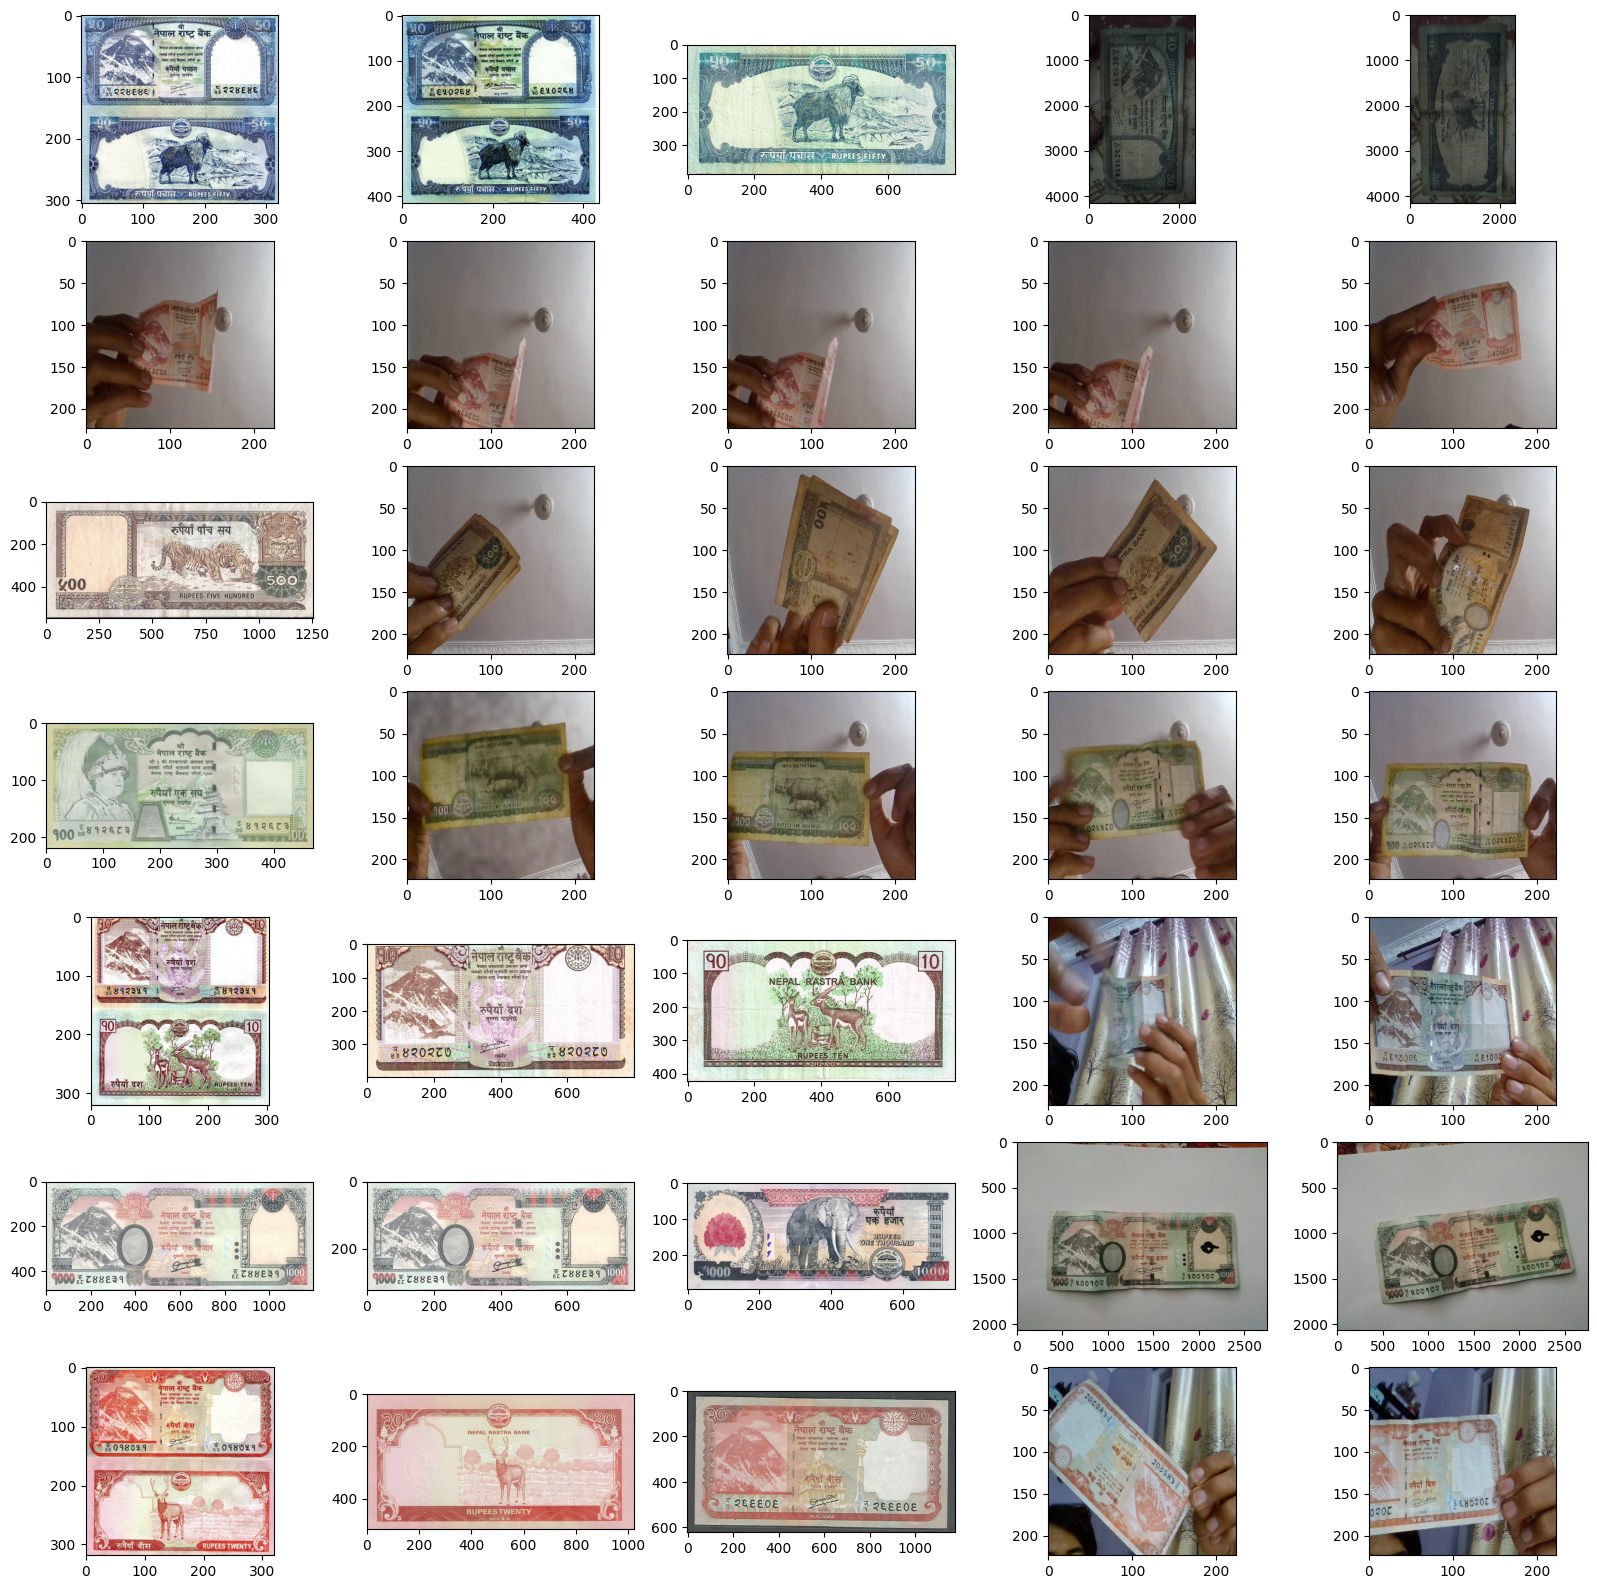

In [9]:
visualize_images(training_image_paths,7,5)

In [33]:
# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features

# Modify the last fully connected layer for the number of classes in your dataset
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

# Move the model to the device
model = model.to(device)

print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(train_dataset.classes)

['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']


In [38]:
import time
import os

# Training loop
num_epochs = 10
base_model_path = '/content/drive/MyDrive/Currency/models'
final_model_path = os.path.join(base_model_path, 'final', 'currency.pth')
checkpoint_path = os.path.join(base_model_path, 'checkpoints')

# Create directories if they don't exist
os.makedirs(os.path.join(base_model_path, 'final'), exist_ok=True)
os.makedirs(checkpoint_path, exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    start_time = time.time()

    for i, (inputs, labels) in enumerate(train_loader, 1):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        iteration_time = time.time() - start_time
        print(f"Iteration {epoch * len(train_loader) + i}/{num_epochs * len(train_loader)}, Loss: {loss.item()}, Time: {iteration_time:.4f} s")

        start_time = time.time()

    average_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}")

    # Save the model checkpoint after each epoch
    epoch_checkpoint_path = os.path.join(checkpoint_path, f'currency_epoch_{epoch + 1}.pth')
    torch.save(model.state_dict(), epoch_checkpoint_path)
    print(f"Checkpoint Model saved to {epoch_checkpoint_path}")

# Save the final model after all epochs
torch.save(model.state_dict(), final_model_path)
print(f"Final Model saved to {final_model_path}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Streaming output truncated to the last 5000 lines.
Iteration 302/5280, Loss: 0.004112026654183865, Time: 0.3231 s
Iteration 303/5280, Loss: 0.012350862845778465, Time: 0.3113 s
Iteration 304/5280, Loss: 0.014120719395577908, Time: 0.3046 s
Iteration 305/5280, Loss: 0.008795141242444515, Time: 0.3231 s
Iteration 306/5280, Loss: 0.15403692424297333, Time: 0.3050 s
Iteration 307/5280, Loss: 0.007487087044864893, Time: 0.3613 s
Iteration 308/5280, Loss: 0.003248725552111864, Time: 0.3167 s
Iteration 309/5280, Loss: 0.007471504155546427, Time: 0.3078 s
Iteration 310/5280, Loss: 0.0028989105485379696, Time: 0.3434 s
Iteration 311/5280, Loss: 0.0234165471047163, Time: 0.3060 s
Iteration 312/5280, Loss: 0.03266427293419838, Time: 0.3008 s
Iteration 313/5280, Loss: 0.03978299722075462, Time: 0.2993 s
Iteration 314/5280, Loss: 0.0017021886305883527, Time: 0.3015 s
Iteration 315/5280, Loss: 0.020723575726151466, Time: 0.2977 s
Iteration 316/5280, Loss: 0.217238649725914, Time: 0.2999 s
Iteration 

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list to store the losses and accuracies
val_losses = []
val_accuracies = []

# Function to update the live plot
def update_plot(epoch, iterations, loss, accuracy):
    plt.clf()

    plt.subplot(1, 2, 1)
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Epoch {epoch + 1}, Iteration {iterations}/{len(val_loader)}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title(f'Epoch {epoch + 1}, Iteration {iterations}/{len(val_loader)}')
    plt.legend()

    plt.tight_layout()
    plt.draw()
    plt.pause(0.001)

In [10]:
# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features

# Modify the last fully connected layer for the number of classes in your dataset
model.fc = torch.nn.Linear(num_ftrs, len(train_dataset.classes))

# Load the trained weights (replace with your actual path)
model_path = 'models/currencyref.pth'
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

E:\Anoconda\envs\Pytorch-ssd\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Anoconda\envs\Pytorch-ssd\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# Validation loop

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 99.58%


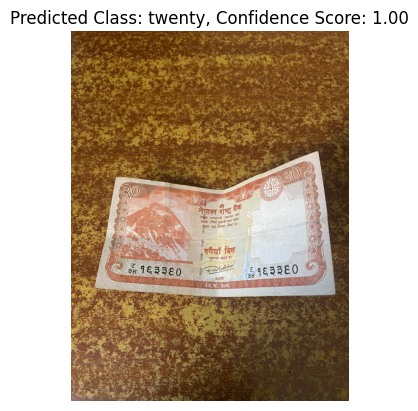

In [12]:

# Load and preprocess the image
image_path = 'dataset/test/387526832_310928974908932_7055688677315200645_n.jpg'
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0).to(device)  # Add a batch dimension and move to device

# Forward pass to get predictions
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
_, predicted_class = torch.max(output, 1)

# Get the corresponding label for the predicted class index from the dataset
predicted_label = train_dataset.classes[predicted_class.item()]

# Get the confidence score for the predicted class
confidence_score = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

# Display the image
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_label}, Confidence Score: {confidence_score:.2f}")
plt.axis('off')
plt.show()

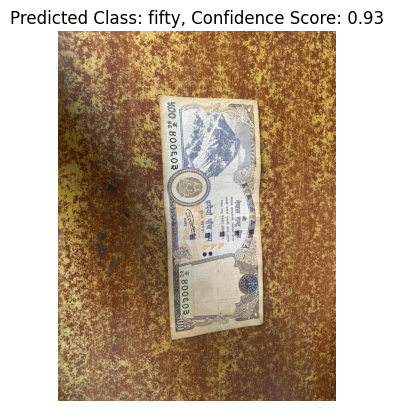

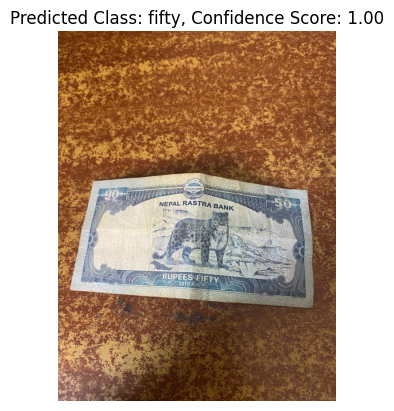

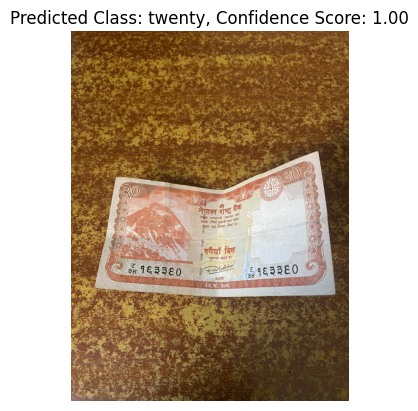

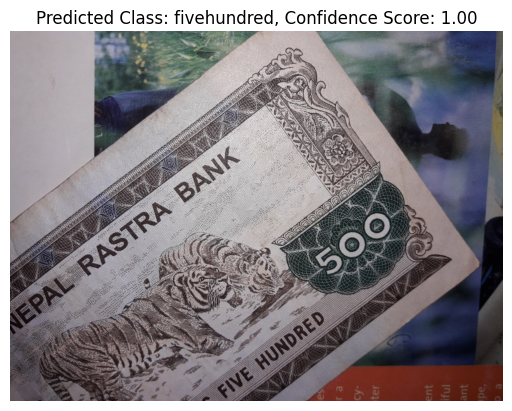

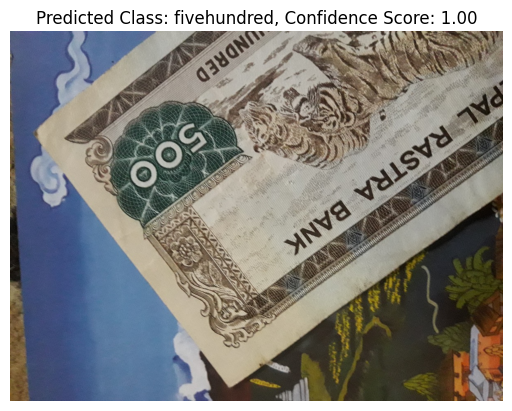

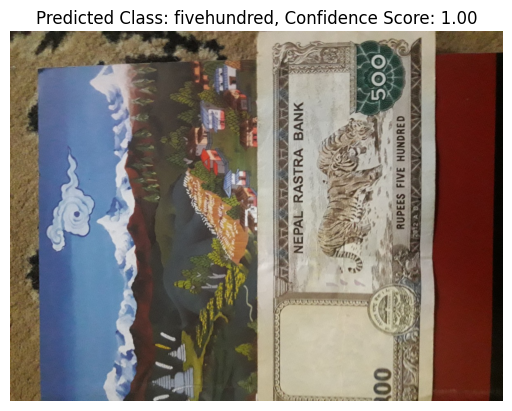

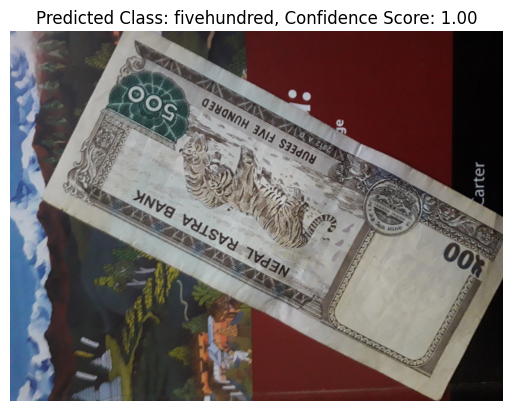

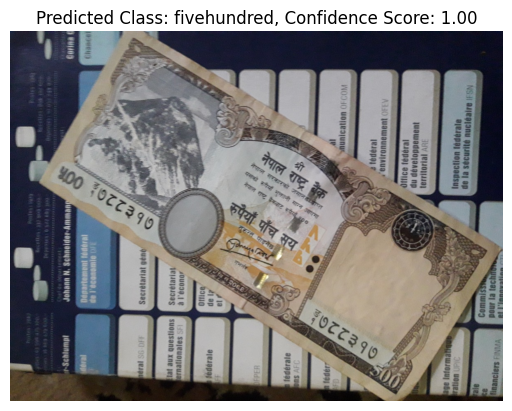

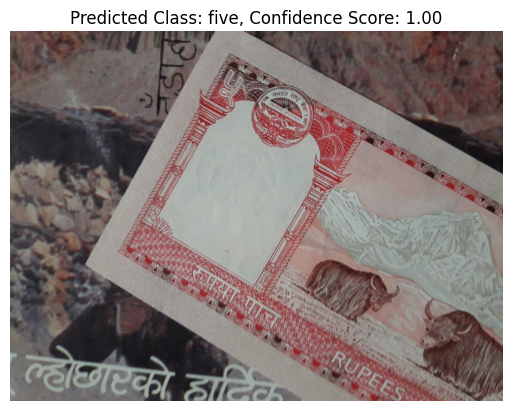

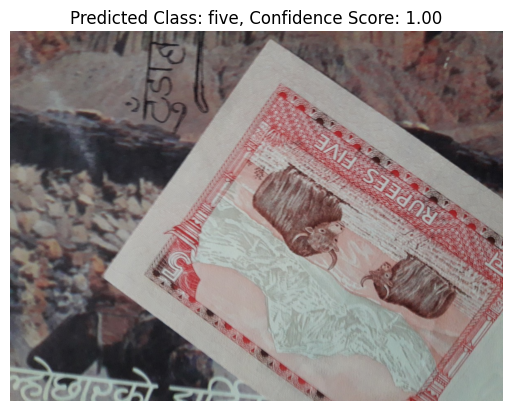

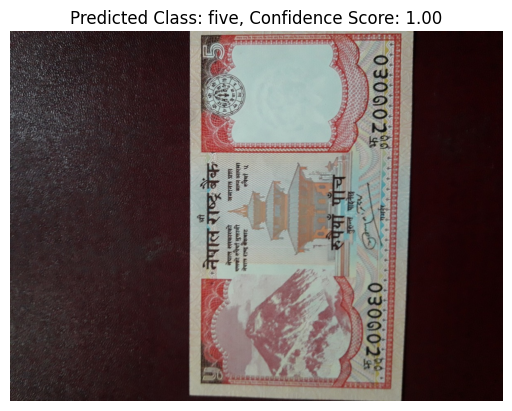

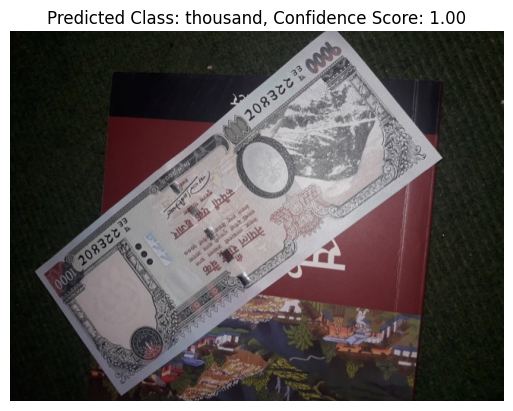

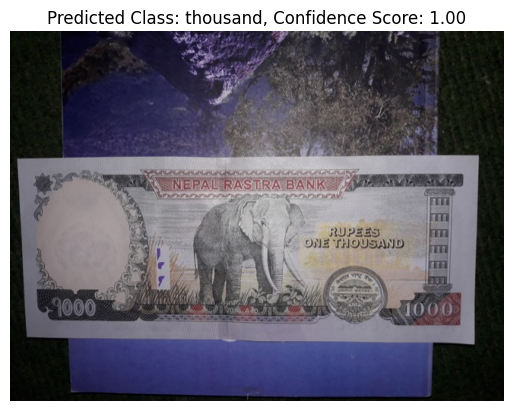

In [13]:
# Folder containing multiple images
folder_path = 'dataset/test/'

# Get a list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process each image in the folder
for image_file in image_files:
    # Load and preprocess the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0).to(device)  # Add a batch dimension and move to device

    # Forward pass to get predictions
    with torch.no_grad():
        output = model(input_batch)

    # Get the predicted class index
    _, predicted_class = torch.max(output, 1)

    # Get the corresponding label for the predicted class index from the dataset
    predicted_label = train_dataset.classes[predicted_class.item()]

    # Get the confidence score for the predicted class
    confidence_score = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    # Display the image and predictions
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}, Confidence Score: {confidence_score:.2f}")
    plt.axis('off')
    plt.show()

In [14]:
# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# OpenCV VideoCapture for webcam (0 represents the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert OpenCV BGR image to RGB (PIL format)
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0).to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        output = model(input_batch)

    # Get the predicted class index
    _, predicted_class = torch.max(output, 1)

    # Get the confidence score for the predicted class
    confidence_score = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    # Display the frame with predictions
    cv2.putText(frame, f"Predicted Class: {predicted_class.item()}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Confidence Score: {confidence_score:.2f}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Live Prediction', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close all windows
cap.release()
cv2.destroyAllWindows()

Live With audio output

In [13]:
import pyttsx3
labels = train_dataset.classes
print(labels)
# Initialize Text-to-Speech engine
engine = pyttsx3.init()

# OpenCV VideoCapture for webcam (0 represents the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert OpenCV BGR image to RGB (PIL format)
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)

    # Forward pass to get predictions
    with torch.no_grad():
        output = model(input_batch)

    # Get the predicted class index
    _, predicted_class = torch.max(output, 1)

    # Get the confidence score for the predicted class
    confidence_score = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    # Map predicted class to label
    predicted_label = labels[predicted_class.item()]

    # Display the frame with predictions
    cv2.putText(frame, f"Predicted Class: {predicted_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Confidence Score: {confidence_score:.2f}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Live Prediction', frame)

    if confidence_score > 0.9:
        engine.say(f"Predicted Class: {predicted_label}")
        engine.runAndWait()


    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close all windows
cap.release()
cv2.destroyAllWindows()

['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']


# 